## Filtrage d'un signal périodique
L'objectif de cette étude est de simuler, à l'aide d'un langage de programmation, l'action d'un filtre sur un signal périodique dont le spectre est fourni et de mettre en évidence l'influence des caractéristiques du filtre sur l'opération de filtrage.

### Redressage d'une tension
La première étape du redressage d'une tension (passage de l'alternatif au continu) est l'utilisation d'un pont de Graëtz.
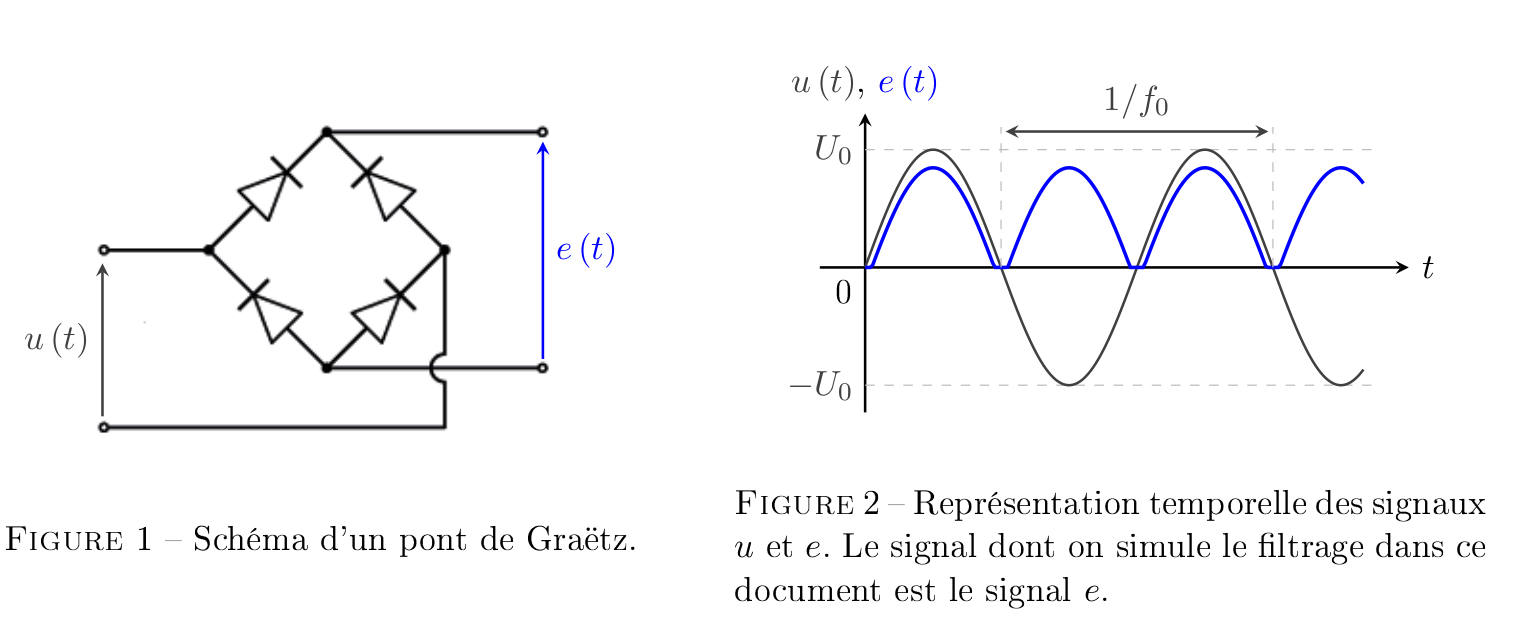
La deuxième étape est un filtrage de la tension $e(t)$ délivrée par le pont de Graëtz par un filtre passe-bas.
L'objectif de la simulation est de faire apparaître les contraintes de dimensionnement sur le ltre
passe-bas à placer en aval du pont de Graëtz pour former un dispositif redresseur délivrant une
tension continue.

In [ ]:
#Bibliothèques utiles
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

In [ ]:
# Paramètres du problème
f0 = 50 # La fréquence du signal sinusoïdal u(t) que l'on veut redresser
U0 = 10 #L'amplitude du signal u(t)
Vs = 0.6 # Tension de seuil des diodes

### Questions préliminaires

#### 1) Fonction $u(t)$
Définir la fonction $u(t)$ qui renvoie la valeur du signal d'entrée à un instant $t$ : $U_0\sin(2\pi f_0 t)$

In [ ]:
# Réponse

#### 2) Fonction $e(t)$
Définir la fonction $e(t)$ quie renvoie la valeur du signal $e(t)$ en sortie du pont de Graëtz définie par :
$$e(t) = \begin{cases}
0 &\text{ pour }|u(t)| < 2V_s\\
|u(t)| - 2 V_s & \text{ sinon}
\end{cases}$$
où $V_s = 0,6$ V désigne la tension de seuil des diodes (définie comme variable globale dans la cellule précédente).

In [ ]:
# Réponse

### Synthèse spectrale du signal $e(t)$
Le signal $e$ est un signal périodique continu, de valeur moyenne non nulle, de fréquence fondamentale $f_e = 2f_0 = 100$ Hz. Il peut donc être décomposé en série de Fourier, sous la forme :
$$e(t) = \frac{c_0}{2} + \sum_{n=1}^{+\infty}c_n\cos(2\pi n f_e t + \varphi_n)$$
Vous allez utiliser l'algorithme de FFT (Fast Fourier Transform) de la bibliothèque numpy pour générer le spectre de ce signal ce qui revient à déterminer les valeurs des $c_n$ et des $\varphi_n$.

#### 3) FFT du signal $e(t)$
Définissez les variables suivantes : 
* $T_{tot}$ la durée total d'échantillonnage qui doit être égale à 100 périodes de $u$ ;
* $f_{ech}$ la fréquence d'échantillonage égale à 20 fois la fréquence de $u$ ;
* $t$ un tableau numpy contenant les instants déchantillonnage, les valeurs de temps vont de 0 à $T_{Tot}$ et sont séparée de $1/f_{ech}$ ;
* $ech$ un tableau numpy qui contient les valeurs $e(t_e)$ pour tout $t_e$ dans $t$ ;
* $N$ qui est la longueur du tableau $ech$ ;
* $\texttt{f}$ le tableau des fréquences pour lesquelles l'amplitude va être calculée $k/T_{tot}, \forall k \in [0,N-1]$.

Réaliser ensuite la FFT en utilisant simplement l'instruction $\texttt{tfd = fft(ech)}$. 

In [ ]:
# Réponse

#### 4) Reconstruction du signal $e(t)$
Les amplitudes $c_n$ des différentes composantes du spectre de $e(t)$ se récupèrent à l'aide de l'instruction $\texttt{amp = np.abs(tfd)*2/N}$ alors que les phases $\varphi_n$ sont données par $\texttt{angle = np.angle(tfd)}$.

Afin d'éviter un artefact de l'algorithme de FFT nommé le repliement de spectre, on ne peut travailler qu'avec  les $N/2$ premières composantes des tableaux.

De manière arbitraire, on ne garde que les harmoniques dont l'amplitude $c_n$ est supérieure à un seuil $U_0/500$.

Écrire une suite d'instructions permettant de créer 3 tableaux numpy $\texttt{freq}$, $c_n$ et $\varphi_n$ contenant respectivement les fréquences, les amplitudes et les phases du spectre de $e(t)$ dont l'amplitude $c_n$ est supérieure au seuil. Ces trois tableaux doivent alors la même taille qu'on notera $N_1$ par la suite.

In [ ]:
# Réponse

#### 5) Vérification graphique
Tracer sur un même graphique me signal $e(t)$ et le signal approché reconstruit à partir de son spectre tronqué :
    $$e_{app} = \frac{c_0}{2} + \sum_{n=1}^{N_1} c_n \cos(2\pi n f_e t + \varphi_n)$$.
Conclure quant à la validité de l'approximation.

In [ ]:
# Réponse

### Action d'un filtre passe-bas d'ordre 1.
Dans le but de réduire l'ondulation du signal $e(t)$, on applique celui-ci en entrée d'un filtre passe-bas d'ordre 1, dont la fonction de transfert s'écrit :
$$H_1(f) = \frac{H_0}{1 + jf/f_c}$$
où $H_0$ et $f_c$ désignent respectivement le gain statique et la fréquence de coupure du filtre.
Pour la suite, on pose $H_0 = 1$. Le gain $G_1$ et le déphasage $\varphi_1$ introduits par un tel filtre sont alors donnés par
$$G_1(f) = |H_1(f)| = \frac{1}{\sqrt{1 + (f/f_c)^2}} \text{ et } \varphi_1(f) = \arg(H_1) = -\arctan(f/f_c)$$

#### 6) Définition du gain et du déphasage
Définir les fonctions $G_1(f,f_c)$ et $\varphi_1(f,f_c)$ qui renvoient respectivement le gain et le déphasage du filtre passe-bas de fréquence de coupure $f_c$ pour un signal d'entrée de fréquence $f$. 

In [ ]:
# Réponse

La linéarité du système permet de déterminer le signal de sortie $s$ associé au signal $e$ en exploitant le principe de superposition, ce qui donne en toute rigueur
$$s(t) = \frac{c_0'}{2} + \sum_{n=1}^{+\infty} c_n'\cos(2\pi n f_e t+\varphi_n') \text{ avec }\begin{cases}
c_n' &= G_1(nf_e)\times c_n\\
\varphi_n' &= \varphi_n + \varphi_1(nf_e)
\end{cases}$$
En se limitant aux $N_1$ premières composantes spectrales du signal d'entrée, on obtient ainsi le signal de sortie approché
$$s(t) \approx \frac{c_0'}{2} + \sum_{n=1}^{N_1} c_n'\cos(2\pi n f_e t+\varphi_n')$$

#### 7) Synthèse spectrale approchée du signal $s$
Définir la fonction $s(t,f_c)$ qui évalue le signal $s$, à l'instant $t$, en sortie du filtre passe-bas dont la fréquence de coupure est $f_c$.

In [ ]:
# Réponse

#### 8) Étude qualitative de l'influence de la fréquence de coupure
Tracer sur un même graphe le signal $e$ et le signal $s$ pour différentes valeurs de la fréquence de coupure. Quelle fréquence de coupure faut-il choisir por réduire l'ondulation du signal de sortie ?

In [ ]:
# Réponse

#### 9) Étude quantitative : calcul du taux d'ondulation
Pour quantifier l'ondulation résiduelle du signal de sortie $s$, on peut calculer son taux d'ondulation $\Omega$ défini par
$$ \Omega = \frac{S_{eff}}{S_{moy}} - 1$$
où $S_{moy}$ et $S_{eff}$ désignent respectivement la valeur moyenne et la valeur efficace du signal $s$. Si on dispose d'un nombre d'échantillons $N_{ech} \gg 1$ du signal s sur une période $T_e = 1/f_e$, on peut accéder rapidement à la valeur moyenne $S_{moy}$ en approchant l'intégrale qui la définit par la méthode des rectangles à gauche, soit
$$\begin{align*}
S_{moy} &= \frac{1}{T_e} \int_0^{T_e} s(t)\mathrm{d}t\\
&\approx \frac{1}{T_e} \sum{k=0}^{N_{ech}} s(kk\delta t)\times \delta t \text{ avec } \delta t = \frac{T_e}{N_{ech}}\\
&\approx \frac{1}{N_{ech}} \sum_{k=0}^{N_{ech}}s(k\delta t)
\end{align*}$$
La valeur moyenne du signal $s$ correspond donc à la moyenne arithmétique des échantillons qui le représentent sur une période. On peut transposer ce résultat aisément pour le calcul de la valeur efficace du signal $s$.
Dès lors, il est envisageable de déterminer le taux d'ondulation du signal de sortie pour plusieurs valeurs de la fréquence de coupure du filtre et de reporter les résultats obtenus dans un diagramme semi-logarithmique.
Écrivez ci-dessous la série d'instructions permettant de tracer ce diagramme

In [ ]:
# Réponse

### Action d'un filtre passe-bas d'ordre $p$
On envisage désormais une fonction de transfert de la forme
$$H_p(f) = H_1^p(f) = \left(\frac{1}{1 + jf/f_c}\right)^p$$
qui peut être obtenue en mettant en cascade plusieurs filtres d'ordre 1 identiques.
Pour un tel filtre, le gain et le déphasage introduits sont respectivement donnés par
$$G_p (f ) = G_1^p(f) \text{ et } \varphi_p(f) = p \times \varphi_1(f)$$
On peut donc transposer réinvestir aisément les calculs réalisés et les fonctions Python définies dans la partie précédente.

#### 10) Simulation pour différentes valeurs de $p$ et pour $f_c = f_e$
La fréquence de coupure $f_c$ des filtres d'ordre 1 mis en cascade est fixée à $f_c = 100$ Hz et on augmente progressivement l'ordre $p$ du filtre. Tracer alors le taux d'ondulation du signal de sortie en fonction de l'ordre $p$ du filtre.
Conclusion.

In [ ]:
# Réponse